Linear Regression: 8814.8144
Decision Tree: 10568.4868
Random Forest: 6923.3952
Gradient Boosting: 8284.5562
Support Vector Regressor: 7186.0082
XGBoost: 7505.0379
AdaBoost: 8349.3995
KNN: 6556.7226
Best model: KNN


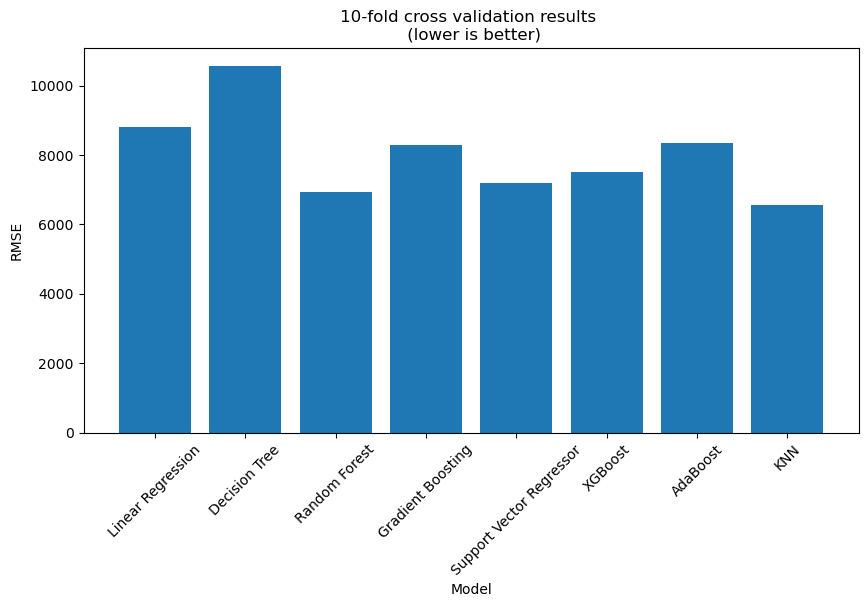

In [14]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset
data = pd.read_csv('dataset/dataset.csv', header = None)
data.columns = data.iloc[0]
dataset = data[1:]
data = dataset.drop(columns=['Year'])

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode 'District' column
data['District'] = label_encoder.fit_transform(data['District'])

# Handling missing data
data = data.fillna(data.mode().iloc[0])

# Convert relevant columns to numeric
for col in ['July', 'August', 'September', 'October', 'November']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Convert all other columns to numeric
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Create the target variable for July to November
data['Target_July_to_November'] = data[['July', 'August', 'September', 'October', 'November']].sum(axis=1)

# Create lag features
data['Previous_Year_July_to_November'] = data.groupby('District')[
    ['July', 'August', 'September', 'October', 'November']
    ].shift(1).sum(axis=1).fillna(0)

# Define features and target
features = data.drop(columns=[
        'January', 'February', 'March', 'April', 'May', 'June', 'December',
        'July', 'August', 'September', 'October', 'November', 'Target_July_to_November'
    ])
features['Previous_Year_July_to_November'] = data['Previous_Year_July_to_November']
target = data['Target_July_to_November']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

# Cross validation (10-fold) to evaluate the model
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR(),
    'XGBoost': XGBRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'KNN': KNeighborsRegressor(),
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
    results[name] = np.sqrt(-scores.mean())

# Display the results
for name, score in results.items():
    print(f"{name}: {score:.4f}")

# Display the best model
best_model = min(results, key=results.get)
print(f"Best model: {best_model}")

# plot the results
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('10-fold cross validation results \n (lower is better)')
plt.xticks(rotation=45)

# Save the plot
plt.savefig('results.png', bbox_inches='tight')

plt.show()






